we will see how Python's Scikit-Learn library can be used to implement the KNN algorithm for classification.

We are going to use the famous iris data set for our KNN example. The dataset consists of four attributes: sepal-width, sepal-length, petal-width and petal-length.

The task is to predict the class to which these plants belong. There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris-virginica.

Further details of the dataset are available

https://archive.ics.uci.edu/ml/datasets/Iris

## Importing Libraries

In [12]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn import datasets 


## Importing the Dataset


In [15]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
data = pd.read_csv(url, names=names) 


## Load the data from sklearn 
#Loading Dataset 
#iris = datasets.load_iris() 
#print(iris.data.shape,iris.target.shape) 
#print ("Iris data set Description : ", iris['DESCR']) 


## Data exploration

In [16]:
data.shape

(150, 5)

In [17]:
data.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class'], dtype='object')

In [18]:
data.dtypes

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
Class            object
dtype: object

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
Class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [20]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
data.tail()

,sepal-length,sepal-width,petal-length,petal-width,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [22]:
data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
data.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
Class           0
dtype: int64

In [24]:
corr = data.corr()
#print(corr.Class)
corr

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


The next step is to split dataset into its input features and labels. The X variable contains the first four columns of the dataset (i.e. attributes) while y contains the labels.

In [26]:
X = data.iloc[:, :-1] 
#X = data.iloc[:.:4]
y = data.iloc[:, 4] 


In [ ]:
X1 = data.iloc[:, :-1].values 
#X = data.iloc[:.:4]
y1 = data.iloc[:, 4].values 

In [27]:
y.value_counts()  # See if the data is balanced


Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Class, dtype: int64

In [28]:
y.value_counts()/len(y)

Iris-virginica     0.333333
Iris-versicolor    0.333333
Iris-setosa        0.333333
Name: Class, dtype: float64

## Train Test Split

The next step is to deivide the data inot training and test which gives better idea as to how algorithm performed on the unseen data. The follwing script dived the data inot 80% train  data and 20% test data.  

In [29]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123) 


X_train.head()


,sepal-length,sepal-width,petal-length,petal-width
130,7.4,2.8,6.1,1.9
119,6.0,2.2,5.0,1.5
29,4.7,3.2,1.6,0.2
0,5.1,3.5,1.4,0.2
62,6.0,2.2,4.0,1.0


In [30]:
print ("X_train:",X_train.shape, "y_train:",y_train.shape) 
print ("X_test:", X_test.shape, "y_test:",y_test.shape) 

X_train: (120, 4) y_train: (120,)
X_test: (30, 4) y_test: (30,)


In [31]:
# Again we wantto make sure that data has been split correctly

print(y_train.value_counts())
print('\n')

y_train.value_counts()/len(y_train)



Iris-versicolor    44
Iris-virginica     39
Iris-setosa        37
Name: Class, dtype: int64




Iris-versicolor    0.366667
Iris-virginica     0.325000
Iris-setosa        0.308333
Name: Class, dtype: float64

In [32]:
print(y_test.value_counts())
print('\n')

y_test.value_counts()/len(y_test)

Iris-setosa        13
Iris-virginica     11
Iris-versicolor     6
Name: Class, dtype: int64




Iris-setosa        0.433333
Iris-virginica     0.366667
Iris-versicolor    0.200000
Name: Class, dtype: float64

## Feature Scaling
Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated. 

In [33]:
from sklearn.preprocessing import StandardScaler    #  ADD MIN MAx Scalar also
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test) )

In [34]:
X_train.head()

,0,1,2,3
0,1.891072,-0.549030,1.323848,0.915092
1,0.161621,-1.916855,0.684916,0.374151
2,-1.444297,0.362854,-1.289966,-1.383908
3,-0.950168,1.046766,-1.406135,-1.383908
4,0.161621,-1.916855,0.104069,-0.302026


## Training and Predictions

The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. In the second line, this class is initialized with one parameter, i.e. n_neigbours. This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, however to start out, 3 seems to be the most commonly used value for KNN algorithm.

In [36]:
from sklearn.neighbors import KNeighborsClassifier  
knn_classifier = KNeighborsClassifier(n_neighbors=3)   
knn_classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [37]:
# List of the neighbors
knn_classifier.kneighbors(X_test)[1]

array([[ 49,  76, 112],
       [ 60,  13,  93],
       [ 48, 104,  93],
       [ 32, 110, 117],
       [ 77,  22,  61],
       [ 42,  59, 102],
       [100,   1,   4],
       [107,  73,  96],
       [ 19,  73,  43],
       [ 79,  25,  72],
       [ 60,  13, 101],
       [105,  63,  55],
       [ 79,  25,  85],
       [ 91,  93,  35],
       [ 86,  37,  82],
       [ 93, 101,  13],
       [ 78,  67,   3],
       [ 19,  73, 107],
       [102,  24,  81],
       [ 51,  43,  61],
       [ 94,  78,  87],
       [ 53, 114, 118],
       [ 34,  87,  56],
       [ 42, 118,  59],
       [ 18,  39,  88],
       [ 78,  94,   3],
       [ 78,  94, 115],
       [ 14,  27,  15],
       [  6, 119,  92],
       [  3,  74, 115]])

The final step is to make predictions on our test data. To do so, execute the following script:

In [40]:
y_pred = knn_classifier.predict(X_test)  

In [41]:
y_pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

## Evaluating the Algorithm
For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. Take a look at the following script:

In [43]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("Classification Score")
print(classification_report(y_test, y_pred))  

print("Accuracy")
print(accuracy_score(y_test, y_pred))  


Confusion Matrix
[[13  0  0]
 [ 0  5  1]
 [ 0  2  9]]
Classification Score
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.71      0.83      0.77         6
 Iris-virginica       0.90      0.82      0.86        11

      micro avg       0.90      0.90      0.90        30
      macro avg       0.87      0.88      0.88        30
   weighted avg       0.91      0.90      0.90        30

Accuracy
0.9


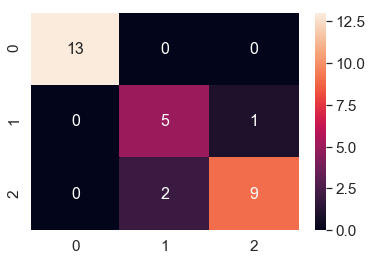

In [44]:
# plot confusion matrix

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(3),range(3))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})

## Comparing Error Rate with the K Value
In the training and prediction section we said that there is no way to know beforehand which value of K that yields the best results in the first go. We randomly chose 3 as the K value 

One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 30.

In [46]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 30):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

print(error)

[0.06666666666666667, 0.1, 0.1, 0.1, 0.1, 0.06666666666666667, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.06666666666666667, 0.06666666666666667, 0.1, 0.13333333333333333, 0.13333333333333333, 0.16666666666666666, 0.16666666666666666, 0.13333333333333333, 0.1, 0.13333333333333333, 0.1, 0.1, 0.1, 0.1, 0.1, 0.13333333333333333, 0.13333333333333333]


The next step is to plot the error values against K values. 


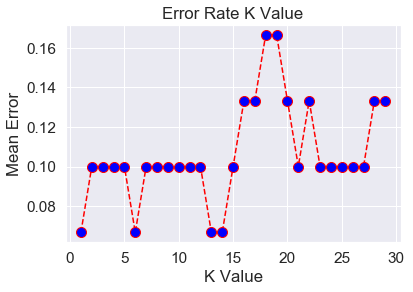

In [47]:
#plt.figure(figsize=(12, 6))  
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()

From the output we can see that the mean error is zero when the value of the K is 2, 6, and 9. I would advise you to play around with the value of K to see how it impacts the accuracy of the predictions.

## Implementing GridsearchCV 

For deciding the value of k, plotting the elbow curve every time is a cumbersome and tedious process. You can simply use gridsearch to find the best value.

In [48]:
from sklearn.model_selection import GridSearchCV
#parameters = {'n_neighbors':[2,3,4,5,6,7,8,9]}
parameters = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()

model = GridSearchCV(knn, parameters, cv=10)
model.fit(X_train, y_train)
model.best_params_


/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 13}

#### KNN Regressor

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
data = pd.read_csv(url, names=names) 


In [ ]:
X = data.iloc[:, :2] 
y = data.iloc[:, 2] 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors = 10)
knnr.fit(X, y)

In [ ]:
print ("The MSE is:",format(np.power(y-knnr.predict(X),2).mean()))